In [1]:
##########Figure 4 GRL - November 2023
#Average by models the chlorophyl maps predicted
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import glob

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels
import statsmodels.api as sm
import esmtools

import cmocean
import colorcet as cc
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config["data_dir"] = './cartopy_shapefiles'

In [2]:
%%time
#Load 10 model and store in dataset
log = "/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/*/GSMstrat*/Chloro_pred/"
log_list = glob.glob(log)
i = 0
ds = xr.open_mfdataset(log_list[i] + "*.nc")
ensemble = ds
for i in np.arange(1,len(log_list)):
    ds = xr.open_mfdataset(log_list[i] + "*.nc")
    ensemble = xr.concat([ensemble,ds], dim="model")
ensemble = ensemble.assign_coords({"model": np.arange(len(log_list))})

CPU times: user 1min 4s, sys: 5.72 s, total: 1min 10s
Wall time: 3min 31s


In [3]:
Em = ensemble.mean(dim = "model")
Em.to_netcdf('/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/GSM_ensemble_mean.nc')

/home2/datahome/epauthen/conda-env/EP_kernel/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [4]:
Estd = ensemble.std(dim = "model")
Estd.to_netcdf('/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/GSM_ensemble_std.nc')

/home2/datahome/epauthen/conda-env/EP_kernel/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


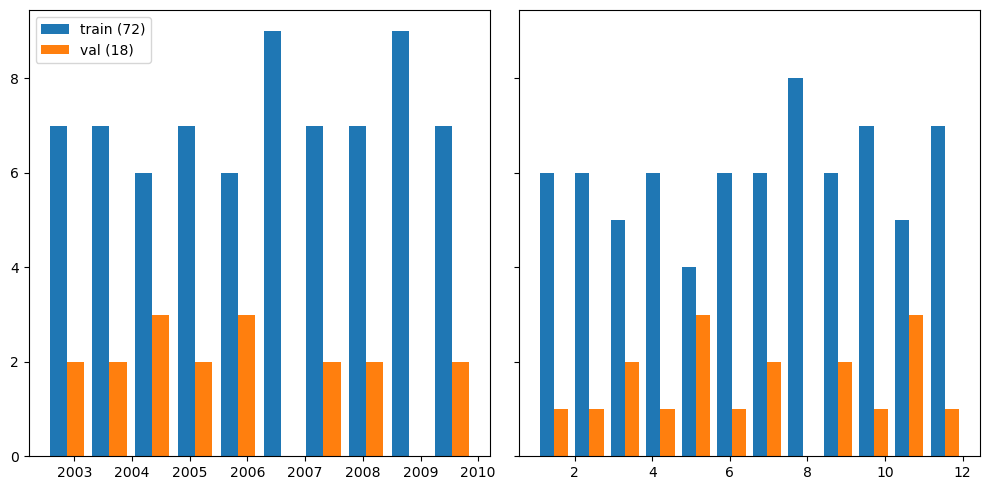

In [5]:
from IPython.display import Image
Image(filename= '/home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/2023-11-02/GSM11-53-37/Train_valid_time.png') 

In [6]:
#ls -l /home/datawork-lops-oh/biogeo/AI/CNN_CHLORO/OUTPUT/Model_GRL/*/

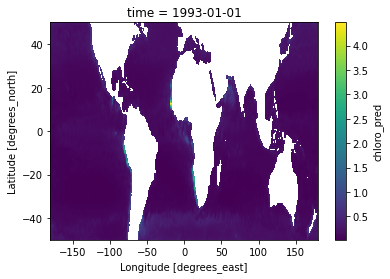

In [7]:
Em.chloro_pred.isel(time = 0).plot()